In [52]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

In [2]:
t0 = 0
n = 6             #liczba zmiennych niezależnych
N = 5000          #Liczba kroków czsowych
q = B = m = 1
omega = q*B/m
T = 2*np.pi/omega #okres obiegu zamkniętej orbity cząstki
dt = 5*T/N

#tn = N * dt
t = np.linspace(t0, T, N)
y = np.zeros((N, n))
A = np.zeros((N, n))
C = np.zeros((N, n))
D = np.zeros((N, n))
E = np.zeros((N, n))
F = np.zeros((N, n))

    #Warunki początkowe 1 (bezruch)
r_01 = 1.5; fi_01 = 1.25*np.pi; z_01 = 0; p_r01 = 0; p_fi01 = 0.5*q*B*r_01**2; p_z01 = 0
    #Warunki początkowe 2 (okrąg centrowany w początku ukł. wsp.)
r_02 = 1; fi_02 = 0; z_02 = 0; p_r02 = 0; p_fi02 = -0.5*q*B*r_02**2; p_z02 = 0
    #Warunki początkowe 3 (okrąg centrowany w początku ukł. wsp. - niezależność od r)
r_03 = 2; fi_03 = 0; z_03 = 0; p_r03 = 0; p_fi03 = -0.5*q*B*r_03**2; p_z03 = 0
    #Warunki początkowe 4 (okrąg zorientowany dowolnie)
r_04 = 2; fi_04 = 0; z_04 = 0; p_r04 = 2; p_fi04 = -0.5*q*B*r_04**2; p_z04 = 0
    #Warunki początkowe 5 (spirala)
r_05 = 1; fi_05 = 0; z_05 = 0; p_r05 = 2; p_fi05 = -0.5*q*B*r_05**2; p_z05 = 1

A[0] = r_01, fi_01, z_01, p_r01, p_fi01, p_z01
C[0] = r_02, fi_02, z_02, p_r02, p_fi02, p_z02
D[0] = r_03, fi_03, z_03, p_r03, p_fi03, p_z03
E[0] = r_04, fi_04, z_04, p_r04, p_fi04, p_z04
F[0] = r_05, fi_05, z_05, p_r05, p_fi05, p_z05

In [3]:
def RK4(k, dt, t, y):
    """
    Metoda RK4 do rozwiązywania układów równań różniczkowych.
    """
    for i in range(1, len(t)):
        k1 = k(t[i-1], y[i-1, :])
        k2 = k(t[i-1] + dt/2, y[i-1, :] + dt*k1/2)
        k3 = k(t[i-1] + dt/2, y[i-1, :] + dt*k2/2)
        k4 = k(t[i-1] + dt, y[i-1, :] + dt*k3)
        y[i, :] = y[i-1, :] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

def k(t, y):
    """
    Funkcja zwracająca wektor pochodnych funkcji y(t) dla układu równań różniczkowych.
    """
    y1, y2, y3, y4, y5, y6 = y[0], y[1], y[2], y[3], y[4], y[5]
    f1 = y4/m
    f2 = y5/(m*y1**2) - q*B/(2*m)
    f3 = y6/m
    f4 = y5**2/(m*y1**3) - (q*B)**2*y1/(4*m)
    f5 = 0
    f6 = 0
    return np.array([f1, f2, f3, f4, f5, f6])

A = RK4(k, dt, t, A)
C = RK4(k, dt, t, C)
D = RK4(k, dt, t, D)
E = RK4(k, dt, t, E)
F = RK4(k, dt, t, F)

In [4]:
#Współrzędne kartezjańskie
r1 = np.zeros((N, 3))
r2 = np.zeros((N, 3))
r3 = np.zeros((N, 3))
r4 = np.zeros((N, 3))
r5 = np.zeros((N, 3))

r1[:,0] = A[:,0]*np.cos(A[:,1]); r1[:,1] = A[:,0]*np.sin(A[:,1]); r1[:,2] = A[:,2]
r2[:,0] = C[:,0]*np.cos(C[:,1]); r2[:,1] = C[:,0]*np.sin(C[:,1]); r2[:,2] = C[:,2]
r3[:,0] = D[:,0]*np.cos(D[:,1]); r3[:,1] = D[:,0]*np.sin(D[:,1]); r3[:,2] = D[:,2]
r4[:,0] = E[:,0]*np.cos(E[:,1]); r4[:,1] = E[:,0]*np.sin(E[:,1]); r4[:,2] = E[:,2]
r5[:,0] = F[:,0]*np.cos(F[:,1]); r5[:,1] = F[:,0]*np.sin(F[:,1]); r5[:,2] = F[:,2]

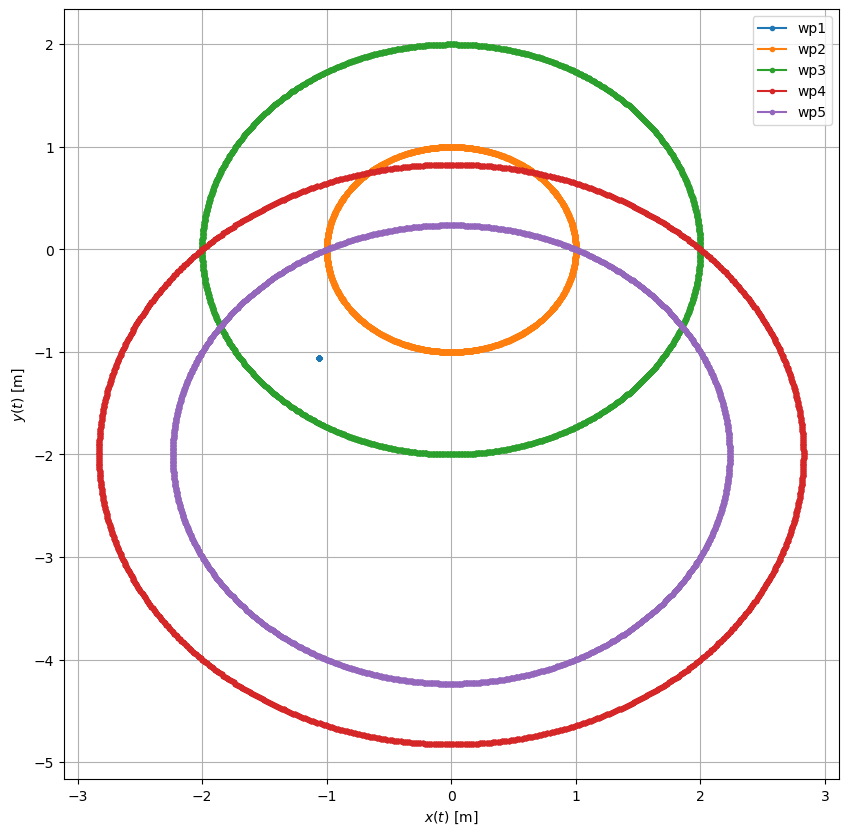

In [31]:
plt.figure(figsize=(10, 10))
plt.plot(r1[:,0], r1[:,1], label='wp1',marker='.')
plt.plot(r2[:,0], r2[:,1], label='wp2',marker='.')
plt.plot(r3[:,0], r3[:,1], label='wp3',marker='.')
plt.plot(r4[:,0], r4[:,1], label='wp4',marker='.')
plt.plot(r5[:,0], r5[:,1], label='wp5',marker='.')

plt.xlabel('$x(t)$ [m]')
plt.ylabel('$y(t)$ [m]')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

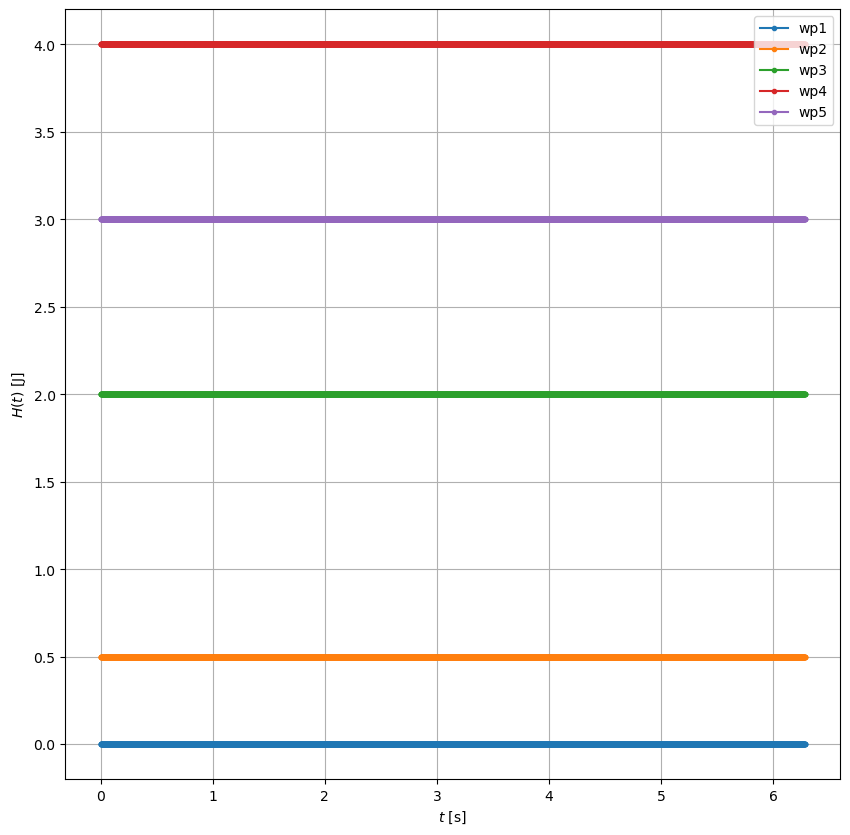

In [32]:
#Definiowanie hamiltonianu układu
H1 = 1/(2*m) * (A[:,3]**2 + (A[:,4]/A[:,0])**2 + A[:,5]**2) - q*B/(2*m) * A[:,4] + ((q*B)**2)/(8*m) * A[:,0]**2
H2 = 1/(2*m) * (C[:,3]**2 + (C[:,4]/C[:,0])**2 + C[:,5]**2) - q*B/(2*m) * C[:,4] + ((q*B)**2)/(8*m) * C[:,0]**2
H3 = 1/(2*m) * (D[:,3]**2 + (D[:,4]/D[:,0])**2 + D[:,5]**2) - q*B/(2*m) * D[:,4] + ((q*B)**2)/(8*m) * D[:,0]**2
H4 = 1/(2*m) * (E[:,3]**2 + (E[:,4]/E[:,0])**2 + E[:,5]**2) - q*B/(2*m) * E[:,4] + ((q*B)**2)/(8*m) * E[:,0]**2
H5 = 1/(2*m) * (F[:,3]**2 + (F[:,4]/F[:,0])**2 + F[:,5]**2) - q*B/(2*m) * F[:,4] + ((q*B)**2)/(8*m) * F[:,0]**2

plt.figure(figsize=(10, 10))
plt.plot(t, H1, label='wp1',marker='.')
plt.plot(t, H2, label='wp2',marker='.')
plt.plot(t, H3, label='wp3',marker='.')
plt.plot(t, H4, label='wp4',marker='.')
plt.plot(t, H5, label='wp5',marker='.')

plt.xlabel('$t$ [s]')
plt.ylabel('$H(t)$ [J]')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

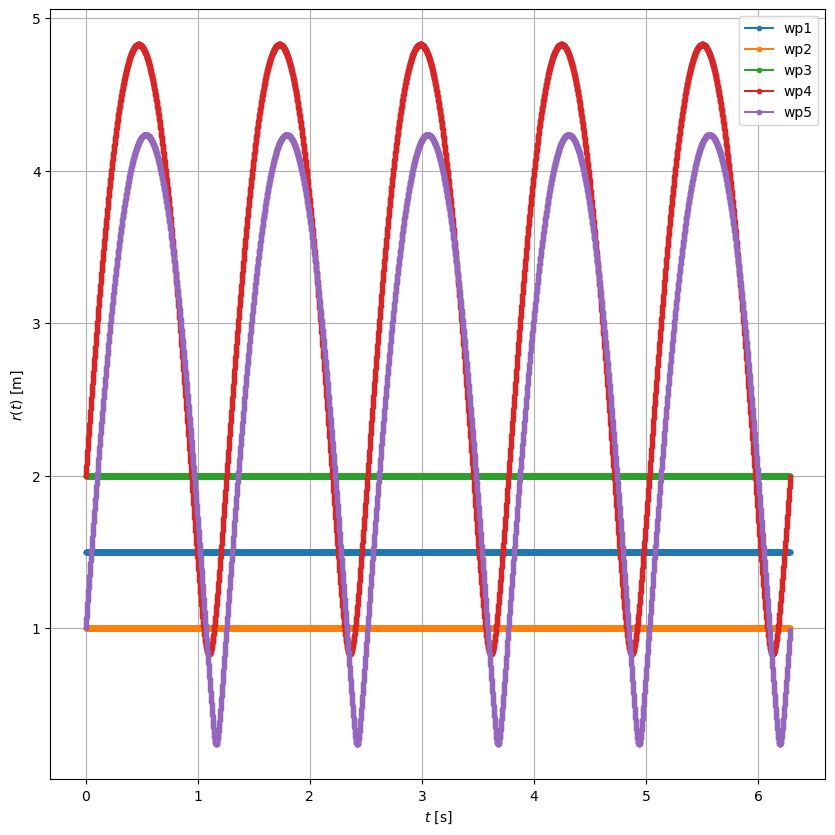

In [33]:
plt.figure(figsize=(10, 10))
plt.plot(t, A[:,0], label='wp1',marker='.')
plt.plot(t, C[:,0], label='wp2',marker='.')
plt.plot(t, D[:,0], label='wp3',marker='.')
plt.plot(t, E[:,0], label='wp4',marker='.')
plt.plot(t, F[:,0], label='wp5',marker='.')

plt.xlabel('$t$ [s]')
plt.ylabel('$r(t)$ [m]')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

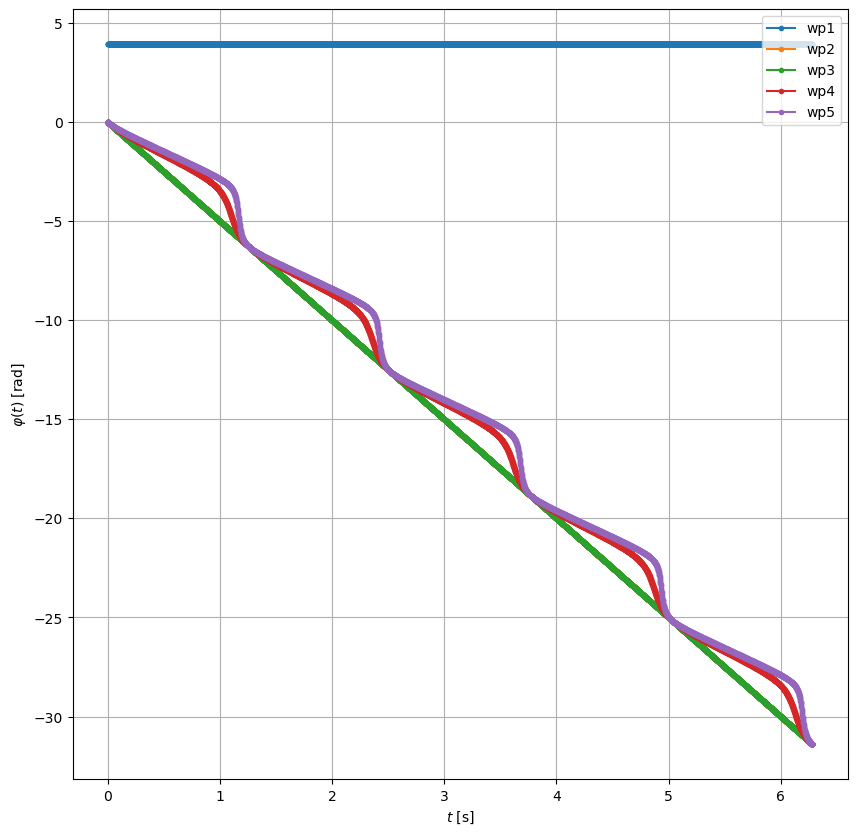

In [53]:
plt.figure(figsize=(10, 10))
plt.plot(t, A[:,1], label='wp1',marker='.')
plt.plot(t, C[:,1], label='wp2',marker='.')
plt.plot(t, D[:,1], label='wp3',marker='.')
plt.plot(t, E[:,1], label='wp4',marker='.')
plt.plot(t, F[:,1], label='wp5',marker='.')

plt.xlabel('$t$ [s]')
plt.ylabel(r'$\varphi(t)$ [rad]')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

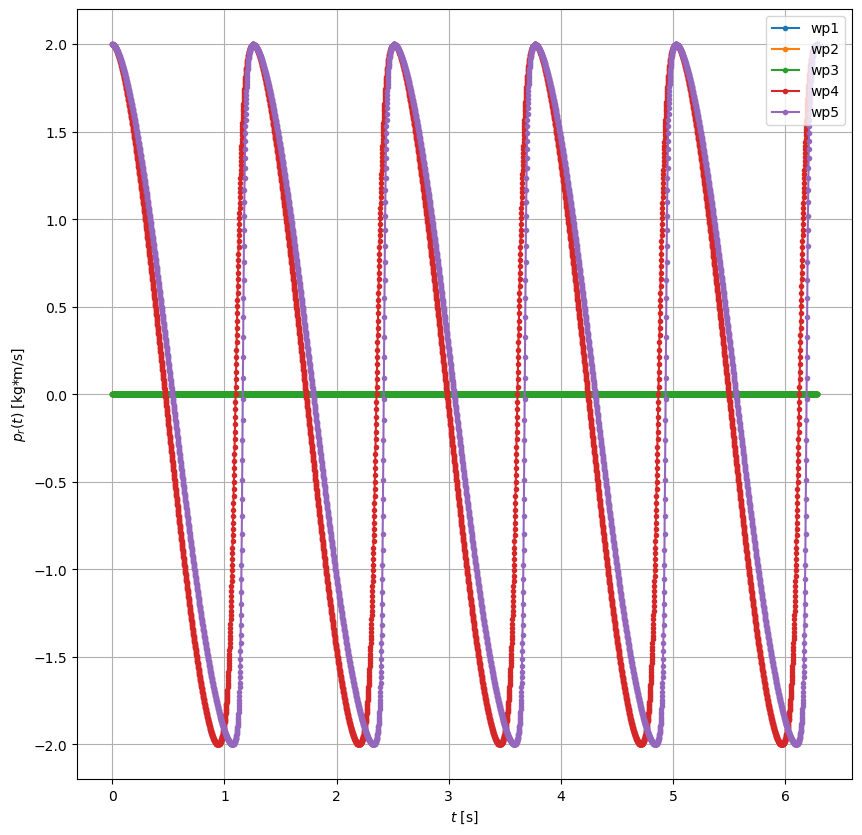

In [34]:
plt.figure(figsize=(10, 10))
plt.plot(t, A[:,3], label='wp1',marker='.')
plt.plot(t, C[:,3], label='wp2',marker='.')
plt.plot(t, D[:,3], label='wp3',marker='.')
plt.plot(t, E[:,3], label='wp4',marker='.')
plt.plot(t, F[:,3], label='wp5',marker='.')

plt.xlabel('$t$ [s]')
plt.ylabel('$p_{r}(t)$ [kg*m/s]')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

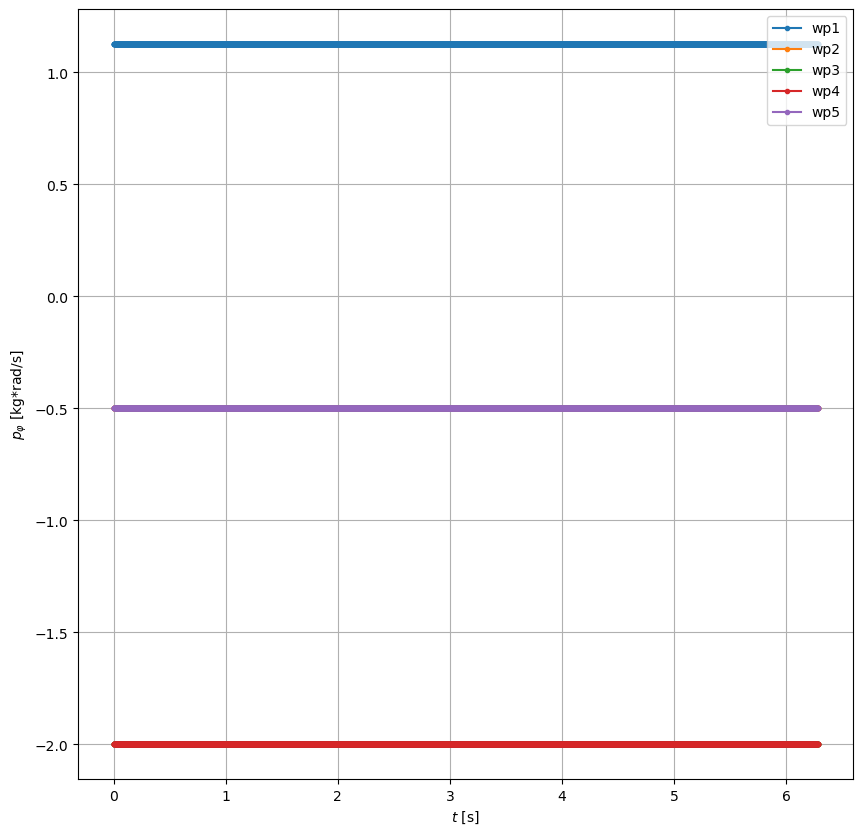

In [35]:
plt.figure(figsize=(10, 10))
plt.plot(t, A[:,4], label='wp1',marker='.')
plt.plot(t, C[:,4], label='wp2',marker='.')
plt.plot(t, D[:,4], label='wp3',marker='.')
plt.plot(t, E[:,4], label='wp4',marker='.')
plt.plot(t, F[:,4], label='wp5',marker='.')

plt.xlabel('$t$ [s]')
plt.ylabel(r'$p_{\varphi}$ [kg*rad/s]')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

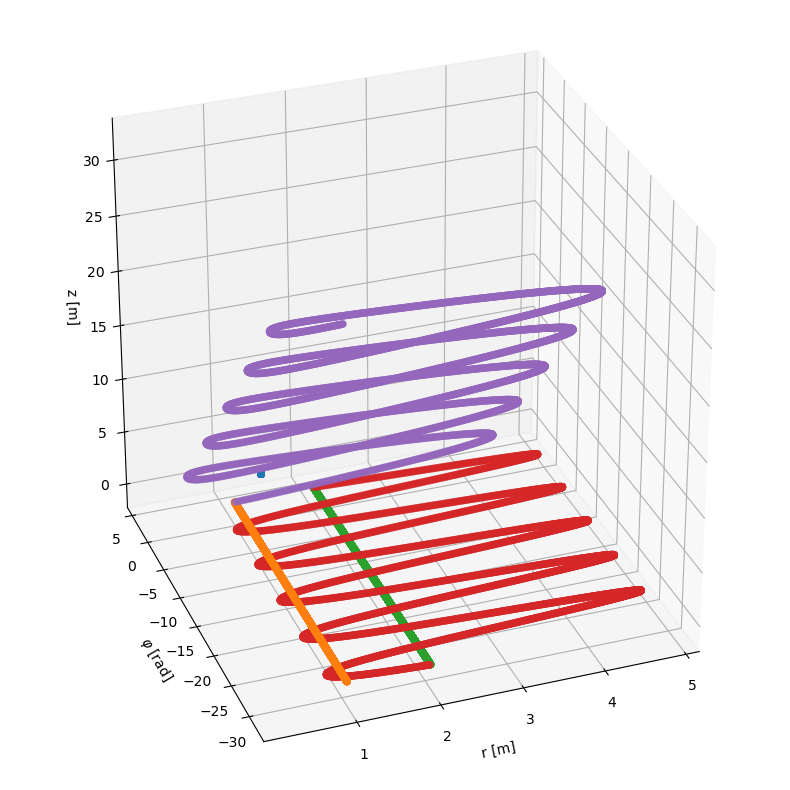

In [54]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Wygenerowanie wykresu 3D
ax.scatter(A[:,0], A[:,1], A[:,2])
ax.scatter(C[:,0], C[:,1], C[:,2])
ax.scatter(D[:,0], D[:,1], D[:,2])
ax.scatter(E[:,0], E[:,1], E[:,2])
ax.scatter(F[:,0], F[:,1], F[:,2])

ax.view_init(elev=30, azim=-110)

ax.set_xlabel('r [m]' )
ax.set_ylabel(r'$\varphi$ [rad]' )
ax.set_zlabel('z [m]' )

ax.set_box_aspect([1, 1, 1])

plt.show()

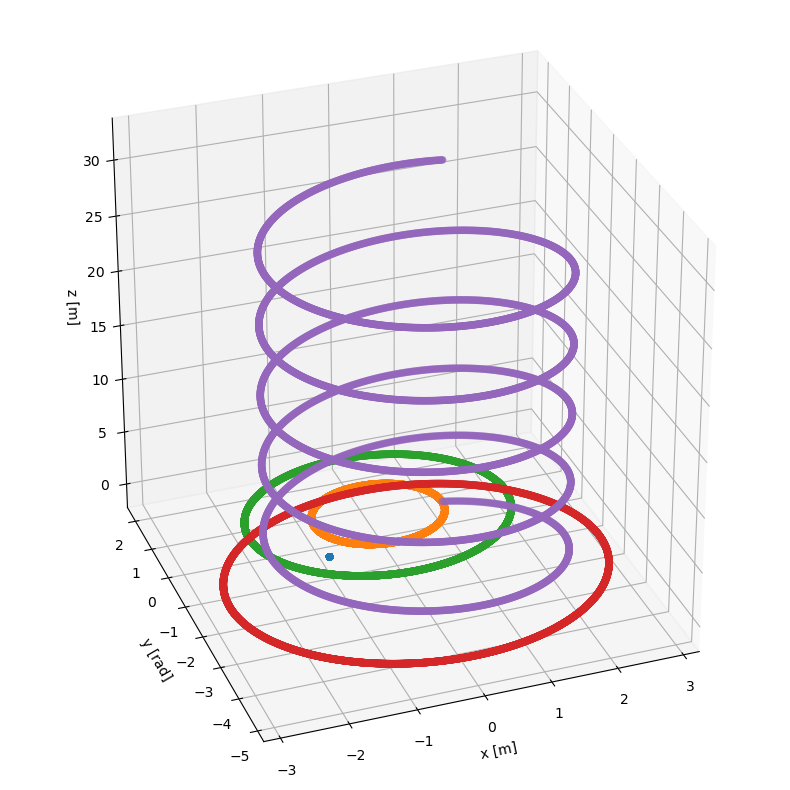

In [55]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Wygenerowanie wykresu 3D
ax.scatter(r1[:,0], r1[:,1], r1[:,2])
ax.scatter(r2[:,0], r2[:,1], r2[:,2])
ax.scatter(r3[:,0], r3[:,1], r3[:,2])
ax.scatter(r4[:,0], r4[:,1], r4[:,2])
ax.scatter(r5[:,0], r5[:,1], r5[:,2])

ax.view_init(elev=30, azim=-110)

ax.set_xlabel('x [m]')
ax.set_ylabel('y [rad]')
ax.set_zlabel('z [m]')

ax.set_box_aspect([1, 1, 1])

plt.show()

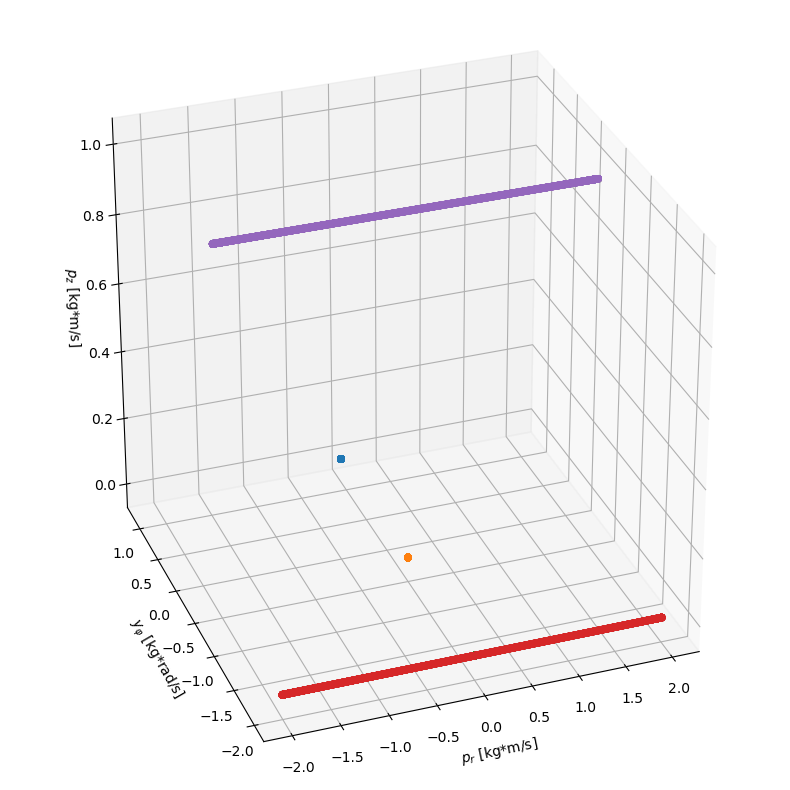

In [51]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Wygenerowanie wykresu 3D
ax.scatter(A[:,3], A[:,4], A[:,5])
ax.scatter(C[:,3], C[:,4], C[:,5])
ax.scatter(D[:,3], D[:,4], D[:,5])
ax.scatter(E[:,3], E[:,4], E[:,5])
ax.scatter(F[:,3], F[:,4], F[:,5])

ax.view_init(elev=30, azim=-110)

ax.set_xlabel(r'$p_{r}$ [kg*m/s]')
ax.set_ylabel(r'$y_{\varphi}$ [kg*rad/s]')
ax.set_zlabel(r'$p_{z}$ [kg*m/s]')

ax.set_box_aspect([1, 1, 1])

plt.show()